<a href="https://colab.research.google.com/github/Puneeth-23BCE0191/23BCE0191.ipynb/blob/main/23BCE0191.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

23BCE0191
Puneeth Reddy

# *Problem Statment and data collection*

In [18]:

import pandas as pd
import numpy as np

school_data = pd.read_csv('https://raw.githubusercontent.com/salemprakash/EDA/main/Data/school93_98.csv')
print(school_data.head())

   rownames  distid  schid      lunch  enrol   exppp      math4  year  y93  \
0         1   34010      1  39.799999  256.0  2506.0  46.599998  1993    1   
1         2   34010      1  35.000000  248.0  2870.0  44.700001  1994    0   
2         3   34010      1  36.590000  244.0  4176.0  86.500000  1995    0   
3         4   34010      1  40.549999  247.0  4333.0  84.300003  1996    0   
4         5   34010      1  49.490002  291.0  3666.0  83.800003  1997    0   

   y94  y95  y96  y97  y98        rexpp   found    lenrol    lrexpp  lavgrexpp  
0    0    0    0    0    0  2783.480957     NaN  5.545177  7.931458        NaN  
1    1    0    0    0    0  3108.198486     NaN  5.513429  8.041799   7.988149  
2    0    1    0    0    0  4397.953125  4478.0  5.497168  8.388894   8.230331  
3    0    0    1    0    0  4432.418945  4754.0  5.509388  8.396701   8.392805  
4    0    0    0    1    0  3666.000000  5032.0  5.673323  8.206857   8.306277  


Now i have imported raw data from the given link

My data set is related to school this are the tags or coloumn

rownames – Row identifiers (probably an index).

distid – District ID.

schid – School ID.

lunch – Percentage of students receiving free or reduced lunch (a proxy for socioeconomic status).

enrol – Number of students enrolled.

exppp – Expenditure per pupil.

math4 – 4th-grade math test scores.

year – Year of observation.

y93, y94, y95, y96, y97, y98 – Dummy variables for specific years (e.g., y93 = 1 if the data is from 1993, otherwise 0).

rexpp – Possibly real (inflation-adjusted) expenditure per pupil.

found – Possibly an indicator variable for whether a school received specific funding.

lenrol – Log of enrollment.

lrexpp – Log of real expenditure per pupil.

lavgrexpp – Log of average real expenditure per pupil.




With this dataset, I can perform several analyses to understand school expenditures, student performance, and enrollment trends. Here’s what I will do:

1. Summarizing the Data
I will calculate basic statistics like mean, median, and standard deviation for key variables.
I will check how school expenditures (exppp, rexpp) and math scores (math4) are distributed.
2. Analyzing Trends Over Time
I will examine how school spending and student performance have changed over different years (year, y93-y98).
I will also look at enrollment trends (enrol, lenrol) to see if schools are growing or shrinking.
3. Investigating the Relationship Between Spending and Performance
I will check if schools that spend more per student (exppp) tend to have higher math scores (math4).
I will create scatter plots or grouped averages to see if there’s a noticeable pattern.
4. Examining Socioeconomic Status and Performance
I will analyze how the percentage of students receiving free or reduced lunch (lunch) affects math scores.
I will compare average math scores for schools with high vs. low lunch percentages to see if economic background plays a role.
5. Exploring the Impact of School Size
I will compare expenditures (exppp, rexpp) across different school sizes (enrol, lenrol).
I will check whether larger schools tend to spend more or less per student and whether they have different student performance levels.
6. Comparing Schools Within the Same District
I will group schools by distid and compare their expenditures and student performance.
I will check if some districts consistently have higher or lower spending and performance.
**Now we have analyzed the problem statement the first step in E.D.A is over the next step is data prepration**

In [19]:
import pandas as pd
#THis is just for practis dosnot contrubute in my analysis
# Create copies of the DataFrame for manipulation
df1 = school_data[['distid', 'schid', 'lunch', 'enrol']].copy()
df2 = school_data[['exppp', 'math4', 'year']].copy()

# Concat (along columns - axis=1)
df_concat_cols = pd.concat([df1, df2], axis=1)

# Append (along rows - axis=0)
df_concat_rows = pd.concat([df1, df2], axis=0, ignore_index=True)

# Join operations (using merge for flexibility)
df_inner_join = pd.merge(df1, df2, left_index=True, right_index=True, how='inner')
df_outer_join = pd.merge(df1, df2, left_index=True, right_index=True, how='outer')
df_left_join = pd.merge(df1, df2, left_index=True, right_index=True, how='left')
df_right_join = pd.merge(df1, df2, left_index=True, right_index=True, how='right')

# Merge operations (same as join)
df_merged_inner = df1.merge(df2, left_index=True, right_index=True, how='inner')
df_merged_outer = df1.merge(df2, left_index=True, right_index=True, how='outer')
df_merged_left = df1.merge(df2, left_index=True, right_index=True, how='left')
df_merged_right = df1.merge(df2, left_index=True, right_index=True, how='right')

print("\Append DataFrame (rows):")
print(df_concat_rows)

print("\Concat DataFrame (columns):")
print(df_concat_cols)

print("\nInner Join:")
print(df_inner_join)

print("\nOuter Join:")
print(df_outer_join)

print("\nLeft Join:")
print(df_left_join)

print("\nRight Join:")
print(df_right_join)

print("\nMerged Inner:")
print(df_merged_inner)

print("\nMerged Outer:")
print(df_merged_outer)

print("\nMerged Left:")
print(df_merged_left)

print("\nMerged Right:")
print(df_merged_right)


\Append DataFrame (rows):
        distid  schid      lunch  enrol  exppp      math4    year
0      34010.0    1.0  39.799999  256.0    NaN        NaN     NaN
1      34010.0    1.0  35.000000  248.0    NaN        NaN     NaN
2      34010.0    1.0  36.590000  244.0    NaN        NaN     NaN
3      34010.0    1.0  40.549999  247.0    NaN        NaN     NaN
4      34010.0    1.0  49.490002  291.0    NaN        NaN     NaN
...        ...    ...        ...    ...    ...        ...     ...
21331      NaN    NaN        NaN    NaN    NaN  72.000000  1994.0
21332      NaN    NaN        NaN    NaN    NaN  62.500000  1995.0
21333      NaN    NaN        NaN    NaN    NaN  63.200001  1996.0
21334      NaN    NaN        NaN    NaN    NaN  78.900002  1997.0
21335      NaN    NaN        NaN    NaN    NaN  87.000000  1998.0

[21336 rows x 7 columns]
\Concat DataFrame (columns):
       distid  schid      lunch  enrol   exppp      math4  year
0       34010      1  39.799999  256.0  2506.0  46.599998  1993

# ***data preprocessing***

In [20]:
import pandas as pd


school_data = pd.read_csv('https://raw.githubusercontent.com/salemprakash/EDA/main/Data/school93_98.csv')
school_data.shape#Exploring dimensions


(10668, 19)

In [21]:


# Check for duplicates
duplicates = school_data.duplicated()
print("Number of duplicate rows:", duplicates.sum())

# Drop duplicates (keeping the first occurrence)
school_data_no_duplicates = school_data.drop_duplicates()
print("Shape of DataFrame after removing duplicates:", school_data_no_duplicates.shape)


Number of duplicate rows: 0
Shape of DataFrame after removing duplicates: (10668, 19)


In [22]:
school_data.describe()#gives summary of the data

,rownames,distid,schid,lunch,enrol,exppp,math4,year,y93,y94,y95,y96,y97,y98,rexpp,found,lenrol,lrexpp,lavgrexpp
count,10668.00000,10668.000000,10668.000000,10365.000000,10499.000000,9731.000000,10565.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,9731.000000,7112.000000,10499.000000,9731.000000,7517.000000
mean,5334.50000,52873.061305,2963.074803,37.384330,417.613963,3778.583702,58.445348,1995.500000,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,3899.637674,5829.744094,5.940707,8.244704,8.263581
std,3079.73067,23938.765714,2009.157208,25.347934,166.694982,923.798238,21.651211,1.707905,0.372695,0.372695,0.372695,0.372695,0.372695,0.372695,879.111231,1054.895417,0.480836,0.218641,0.191407
min,1.00000,1010.000000,1.000000,0.000000,7.000000,254.000000,1.800000,1993.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.124542,4200.000000,1.945910,5.642349,7.404839
25%,2667.75000,33070.000000,1306.000000,16.360001,307.000000,3155.500000,43.200001,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3325.719849,5203.000000,5.726848,8.109442,8.142113
50%,5334.50000,56010.000000,2562.500000,33.330002,405.000000,3737.000000,59.799999,1995.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3823.120850,5587.000000,6.003887,8.248822,8.259392
75%,8001.25000,75100.000000,4421.000000,54.169998,507.000000,4278.500000,75.000000,1997.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4352.629395,6060.000000,6.228511,8.378535,8.378363
max,10668.00000,83070.000000,7725.000000,100.000000,1353.000000,13581.000000,100.000000,1998.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14708.167969,10916.000000,7.210080,9.596158,9.397722


In [23]:
school_data.isnull()#True represents the missing values "NaN" in our Dataset

,rownames,distid,schid,lunch,enrol,exppp,math4,year,y93,y94,y95,y96,y97,y98,rexpp,found,lenrol,lrexpp,lavgrexpp
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10663,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,True,False,True,True
10664,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,True,True
10665,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,True,True
10666,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,True,True


In [24]:
school_data.isnull().sum().sum()# Total number of missing values in dataset

np.int64(10262)

In [25]:
#Missing value for every column
new_df = school_data.copy()
print(new_df.isna().sum())

rownames        0
distid          0
schid           0
lunch         303
enrol         169
exppp         937
math4         103
year            0
y93             0
y94             0
y95             0
y96             0
y97             0
y98             0
rexpp         937
found        3556
lenrol        169
lrexpp        937
lavgrexpp    3151
dtype: int64


# I am gonna clean the data from here onward use the cleaned data for better analysis and this will be my last step in data preperation

In [26]:
# Create a copy of the original DataFrame
new_df = school_data.copy()

# Filling missing values
new_df['lunch'] = school_data['lunch'].bfill()  # Use bfill() directly to avoid FutureWarning

# Using median for numerical columns
med_enrol = school_data['enrol'].median()
med_exppp = school_data['exppp'].median()
med_math4 = school_data['math4'].median()

new_df['enrol'] = school_data['enrol'].fillna(med_enrol)
new_df['exppp'] = school_data['exppp'].fillna(med_exppp)
new_df['math4'] = school_data['math4'].fillna(med_math4)

# Using mode for categorical column 'found'
mode_found = school_data['found'].mode()[0]
new_df['found'] = school_data['found'].fillna(mode_found)

# Filling other missing values with median
new_df['lenrol'] = school_data['lenrol'].fillna(school_data['lenrol'].median())
new_df['lrexpp'] = school_data['lrexpp'].fillna(school_data['lrexpp'].median())
new_df['lavgrexpp'] = school_data['lavgrexpp'].fillna(school_data['lavgrexpp'].median())

# Print the count of missing values after filling
print(new_df.isna().sum())



rownames       0
distid         0
schid          0
lunch          0
enrol          0
exppp          0
math4          0
year           0
y93            0
y94            0
y95            0
y96            0
y97            0
y98            0
rexpp        937
found          0
lenrol         0
lrexpp         0
lavgrexpp      0
dtype: int64


In [27]:
# Filling rexpp using exppp, then using median for remaining NaNs
new_df['rexpp'] = school_data['rexpp'].fillna(school_data['exppp'])
new_df['rexpp'] = new_df['rexpp'].fillna(new_df['rexpp'].median())
#I have taken an intresting way to resolve missing values in rexppp as it is related somewhat so i dont want to mess the relation by replacing it just by any random value Like mean or median but insted replaced it with exppp then the remaing some are replaced by median of rexppp
print(new_df.isna().sum())


rownames     0
distid       0
schid        0
lunch        0
enrol        0
exppp        0
math4        0
year         0
y93          0
y94          0
y95          0
y96          0
y97          0
y98          0
rexpp        0
found        0
lenrol       0
lrexpp       0
lavgrexpp    0
dtype: int64


In [28]:
import numpy as np

for column in new_df.columns:
    column_data = new_df[column]
    # Filter values that exceed 3, in absolute terms
    exceeded_values = column_data[np.abs(column_data) > 80000]
    if not exceeded_values.empty:
        print(f"Column: {column}")
        print(exceeded_values)
        print("\n")
        #I have checked there are No outliers to be replaced by mean or median value





Column: distid
12       82010
13       82010
14       82010
15       82010
16       82010
         ...  
10651    82010
10652    82010
10653    82010
10654    82010
10655    82010
Name: distid, Length: 2436, dtype: int64




In [29]:
TotalTransaction = new_df["exppp"]
TotalTransaction[np.abs(TotalTransaction) > 400]

,exppp
0,2506.0
1,2870.0
2,4176.0
3,4333.0
4,3666.0
...,...
10663,3737.0
10664,3737.0
10665,3737.0
10666,3737.0


 I HAVE NOW COMPLETED DATA PREPERATION Now Data analysis is left
 # Univariate analysis

In [30]:

# Calculate basic statistics for key variables
print(new_df[['exppp', 'rexpp', 'math4']].describe())

# Check the distribution of school expenditures and math scores
print(new_df[['exppp', 'rexpp', 'math4']].median())
print(new_df[['exppp', 'rexpp', 'math4']].std())


              exppp         rexpp         math4
count  10668.000000  10668.000000  10668.000000
mean    3774.931290   3892.916989     58.458427
std      882.370639    839.892218     21.546833
min      254.000000    282.124542      1.800000
25%     3229.750000   3377.436340     43.299999
50%     3737.000000   3823.120850     59.799999
75%     4216.000000   4287.529053     74.699997
max    13581.000000  14708.167969    100.000000
exppp    3737.000000
rexpp    3823.120850
math4      59.799999
dtype: float64
exppp    882.370639
rexpp    839.892218
math4     21.546833
dtype: float64


The data shows significant variation in both school expenditures (exppp, rexpp) and math scores (math4). On average, expenditures and revenues are close, but with wide disparities across schools. The average math score is moderate, but there's considerable variability, indicating differences in performance. This suggests disparities in resources and outcomes that may warrant further investigation into funding and its impact on student performance.

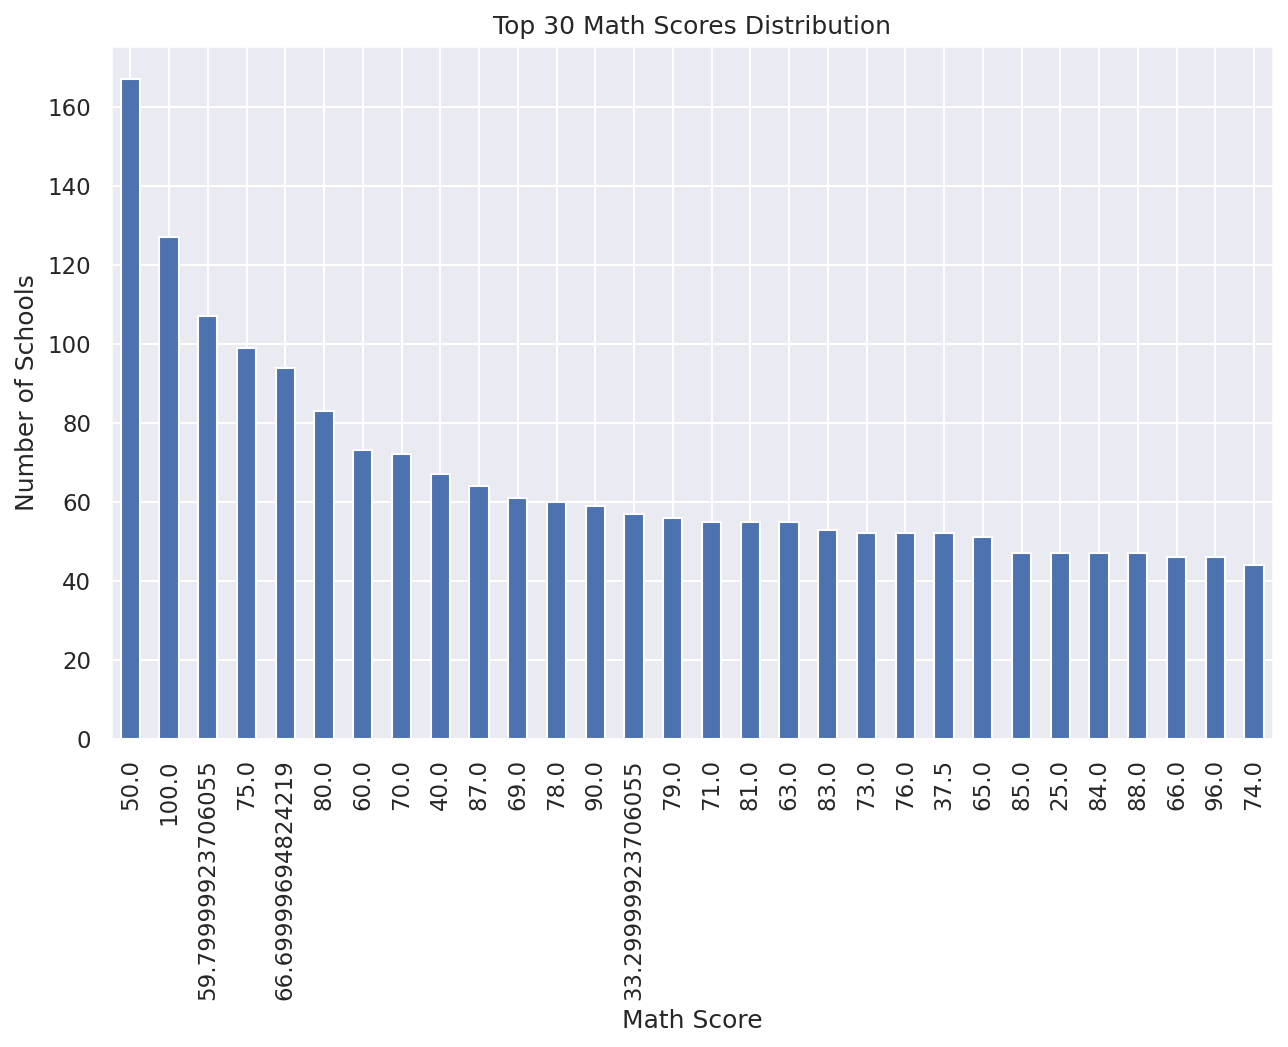

In [31]:

import matplotlib.pyplot as plt

# Plotting the top 30 most frequent math scores
new_df['math4'].value_counts().nlargest(30).plot(kind='bar', figsize=(10,6))

# Adding titles and labels
plt.title("Top 30 Math Scores Distribution")
plt.ylabel('Number of Schools')
plt.xlabel('Math Score')
plt.show()


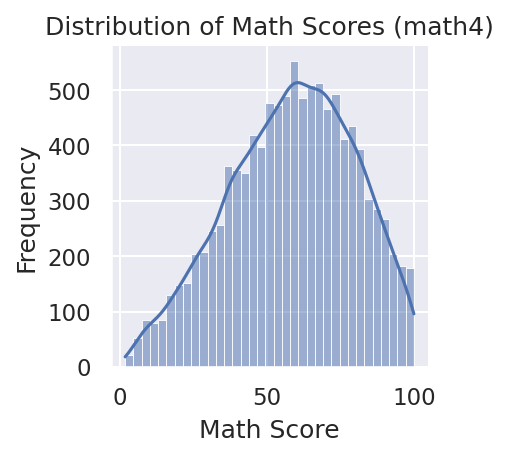

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

#I am  interested in the 'math4' column
sns.FacetGrid(new_df).map(sns.histplot, "math4", kde=True).add_legend()

# Adding titles and labels
plt.title("Distribution of Math Scores (math4)")
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()


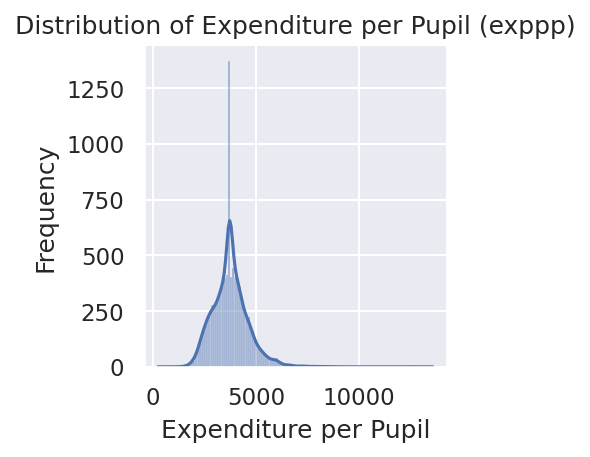

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of 'exppp' (expenditure per pupil)
sns.FacetGrid(new_df).map(sns.histplot, "exppp", kde=True).add_legend()

# Adding titles and labels
plt.title("Distribution of Expenditure per Pupil (exppp)")
plt.xlabel('Expenditure per Pupil')
plt.ylabel('Frequency')
plt.show()



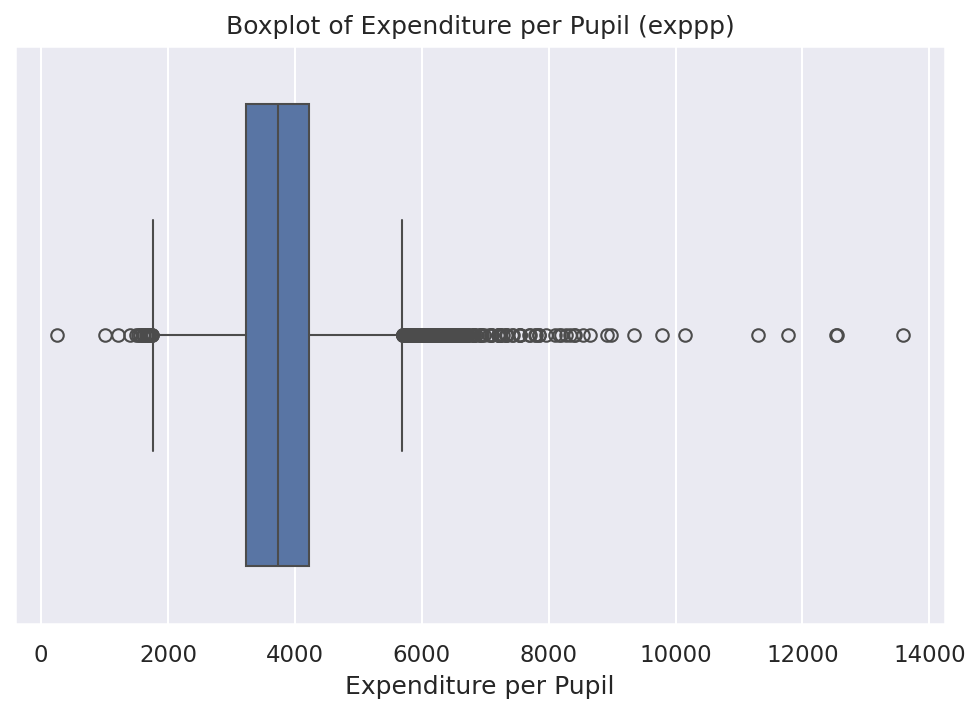

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for 'exppp' (Expenditure per Pupil)
sns.boxplot(x="exppp", data=new_df)

# Display the plot
plt.title("Boxplot of Expenditure per Pupil (exppp)")
plt.xlabel('Expenditure per Pupil')
plt.show()


# *Bivariate Analysis*

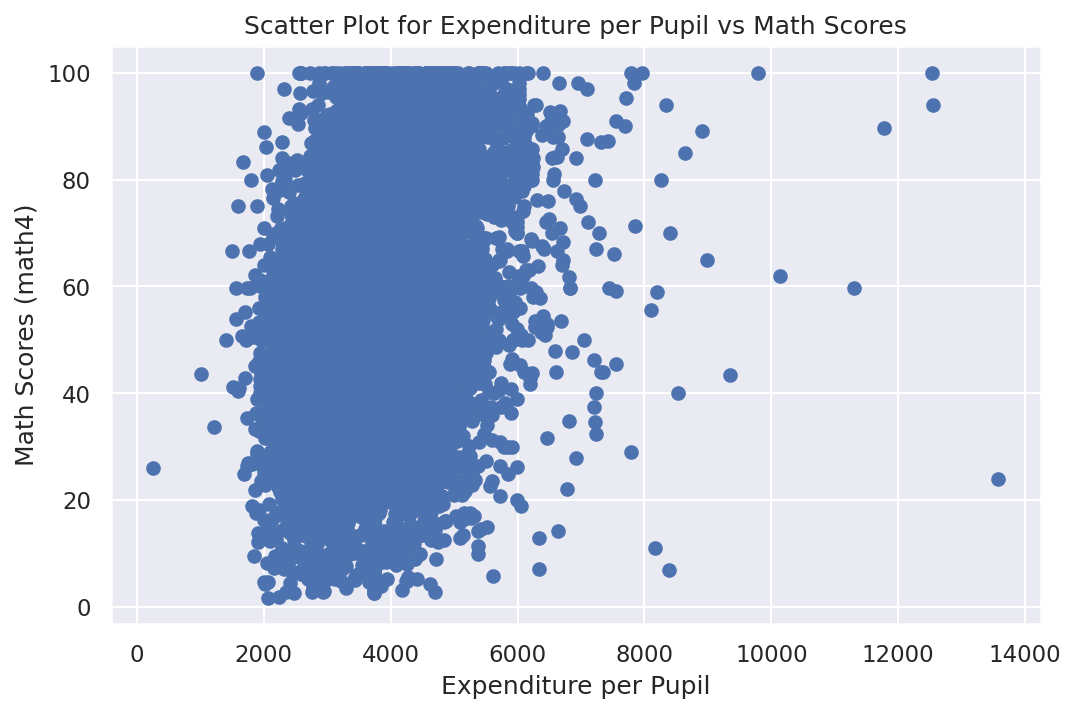

In [35]:
import matplotlib.pyplot as plt

# Scatter plot between 'exppp' (expenditure per pupil) and 'math4' (math scores)
plt.scatter(new_df["exppp"], new_df["math4"])

# Adding titles and labels
plt.title("Scatter Plot for Expenditure per Pupil vs Math Scores")
plt.xlabel("Expenditure per Pupil")
plt.ylabel("Math Scores (math4)")

# Display the plot
plt.show()


In [36]:
import numpy as np

# Calculate correlation matrix for numeric columns
correlation_matrix = new_df[['exppp', 'rexpp', 'math4', 'y93', 'y94', 'y95', 'y96', 'y97', 'y98']].corr()
# Print the correlation matrix
print(correlation_matrix)


          exppp     rexpp     math4       y93       y94       y95       y96  \
exppp  1.000000  0.988888  0.263522 -0.385401 -0.247972  0.009643  0.113856   
rexpp  0.988888  1.000000  0.225877 -0.323834 -0.211342  0.053197  0.105655   
math4  0.263522  0.225877  1.000000 -0.327326 -0.203318  0.058494  0.101305   
y93   -0.385401 -0.323834 -0.327326  1.000000 -0.200000 -0.200000 -0.200000   
y94   -0.247972 -0.211342 -0.203318 -0.200000  1.000000 -0.200000 -0.200000   
y95    0.009643  0.053197  0.058494 -0.200000 -0.200000  1.000000 -0.200000   
y96    0.113856  0.105655  0.101305 -0.200000 -0.200000 -0.200000  1.000000   
y97    0.231378  0.180769  0.044065 -0.200000 -0.200000 -0.200000 -0.200000   
y98    0.278496  0.195555  0.326780 -0.200000 -0.200000 -0.200000 -0.200000   

            y97       y98  
exppp  0.231378  0.278496  
rexpp  0.180769  0.195555  
math4  0.044065  0.326780  
y93   -0.200000 -0.200000  
y94   -0.200000 -0.200000  
y95   -0.200000 -0.200000  
y96   -0.2000

In [37]:
import pandas as pd

# Convert 'schid' to a categorical variable
new_df['schoolId_cat'] = pd.Categorical(new_df['schid'])

# Check the new column in the dataframe
new_df['schoolId_cat'].head()
# Calculate the mean of 'math4'
math4_mean = new_df['math4'].mean()

# Create an empty list to store the category values
math4_categories = []

# Loop through each value in 'math4' and classify as 'Above Avg' or 'Below Avg'
for score in new_df['math4']:
    if score > math4_mean:
        math4_categories.append('Above Avg')
    else:
        math4_categories.append('Below Avg')

# Append the new category column to the dataframe
new_df['math4_category'] = math4_categories

# Check the updated dataframe with the new categorical column
new_df[['math4', 'math4_category']].head()



,math4,math4_category
0,46.599998,Below Avg
1,44.700001,Below Avg
2,86.500000,Above Avg
3,84.300003,Above Avg
4,83.800003,Above Avg


In [38]:
new_df.dtypes

,0
rownames,int64
distid,int64
schid,int64
lunch,float64
enrol,float64
exppp,float64
math4,float64
year,int64
y93,int64
y94,int64


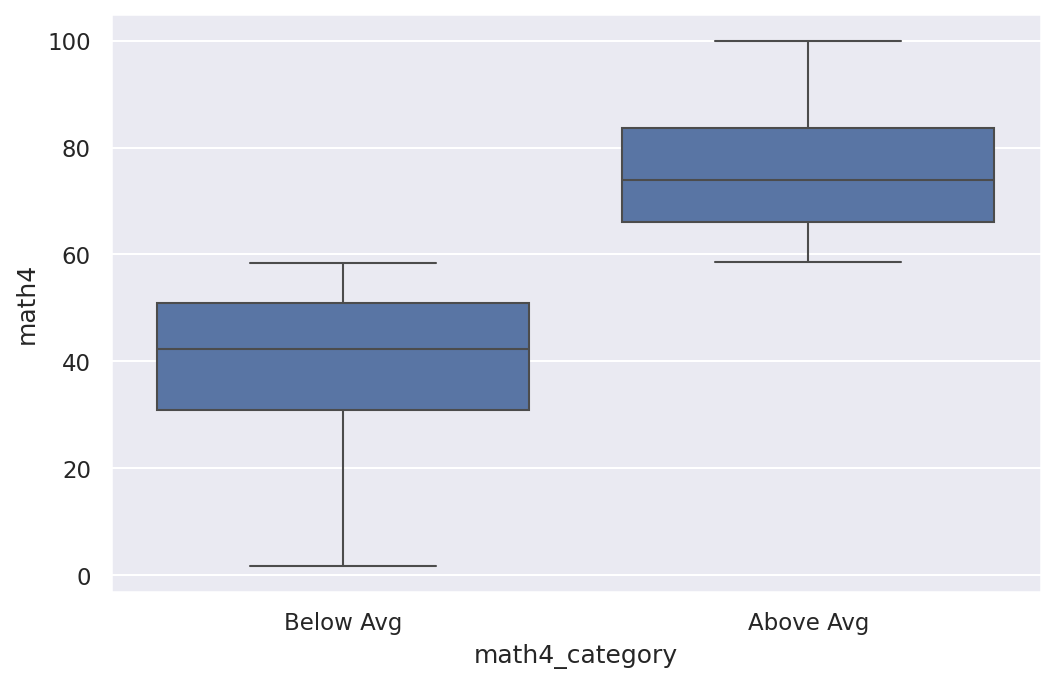

In [39]:
sns.boxplot(x="math4_category", y="math4", data=new_df)
plt.show()

# ***Multivariate Analysis***

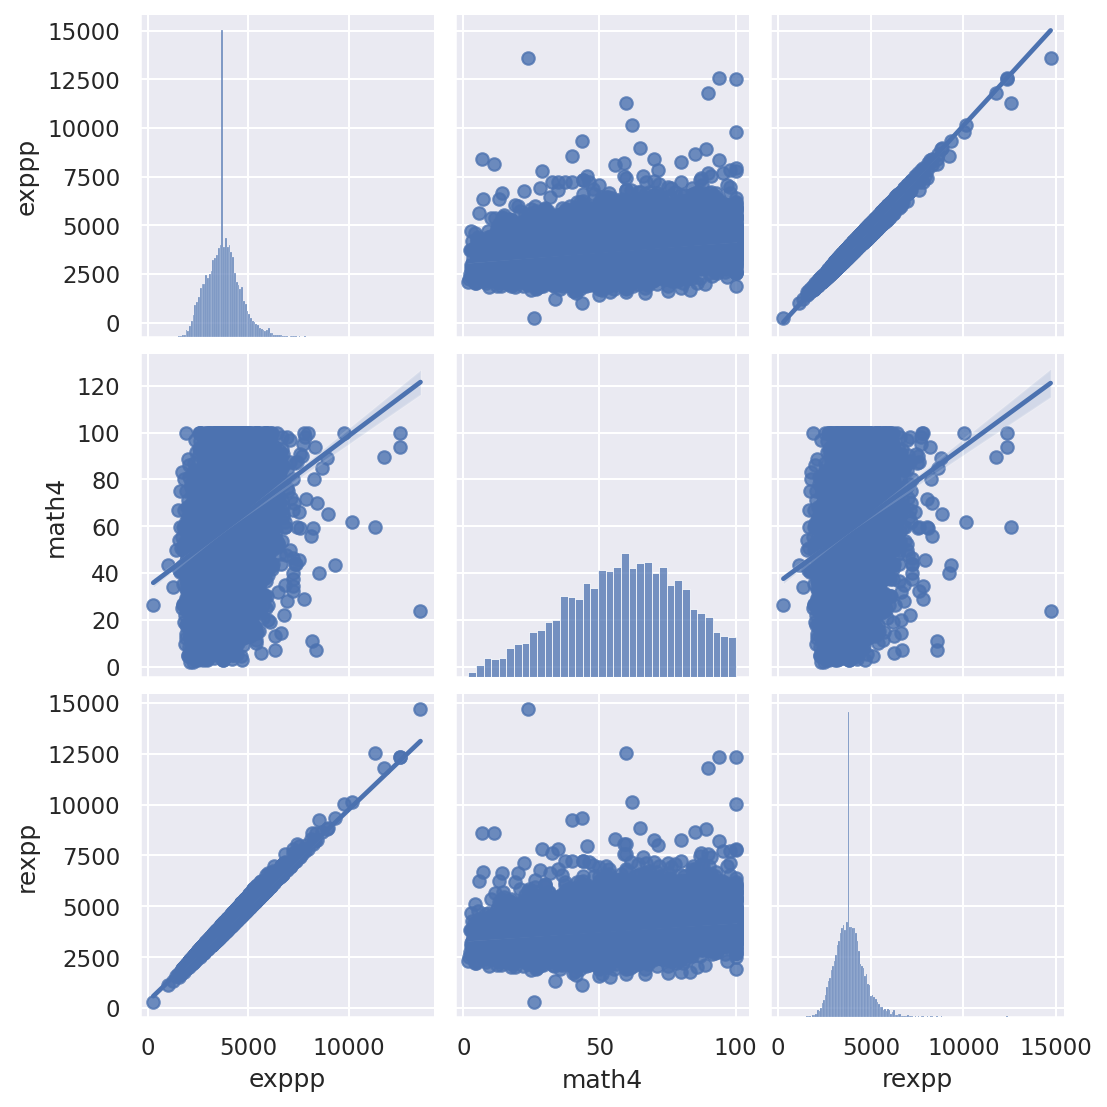

In [40]:
sns.pairplot(new_df, vars=['exppp', 'math4', 'rexpp'], kind="reg")
plt.show()


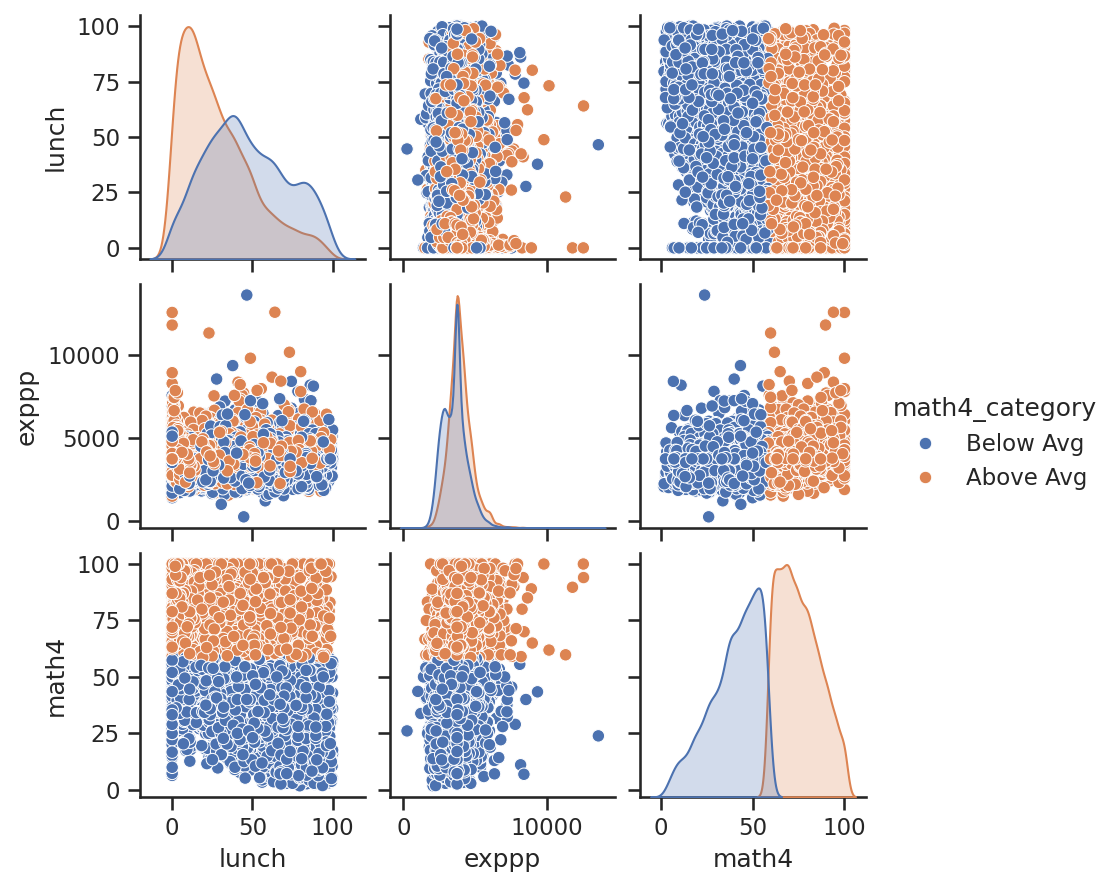

In [41]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(new_df, height=2, vars=['lunch', 'exppp', 'math4'], hue="math4_category")
plt.show()


In [42]:
from scipy import stats

# Calculate the correlation coefficient between 'exppp' and 'math4'
corr = stats.pearsonr(new_df["exppp"], new_df["math4"])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

# To find the correlation among all numerical columns
correlation = new_df.corr(method='pearson', numeric_only=True)
print(correlation)


p-value:	 5.899532898927115e-169
cor:		 0.2635219721092831
           rownames        distid         schid     lunch     enrol     exppp  \
rownames   1.000000 -2.438636e-02  9.816934e-01 -0.115220 -0.000616  0.016324   
distid    -0.024386  1.000000e+00 -2.461120e-02  0.026768  0.267850  0.075209   
schid      0.981693 -2.461120e-02  1.000000e+00 -0.134496  0.017154  0.009834   
lunch     -0.115220  2.676803e-02 -1.344963e-01  1.000000  0.071472  0.065528   
enrol     -0.000616  2.678504e-01  1.715357e-02  0.071472  1.000000 -0.162935   
exppp      0.016324  7.520917e-02  9.834146e-03  0.065528 -0.162935  1.000000   
math4      0.074761 -1.724050e-02  8.707405e-02 -0.463584 -0.074157  0.263522   
year       0.000555  5.390589e-14 -3.970492e-13  0.027783 -0.009109  0.530460   
y93       -0.000363 -1.121941e-17 -1.651041e-16 -0.016864 -0.006576 -0.385401   
y94       -0.000218 -2.011658e-17 -5.078090e-16 -0.013221  0.014426 -0.247972   
y95       -0.000073 -5.517007e-17  6.588650e-16 -0

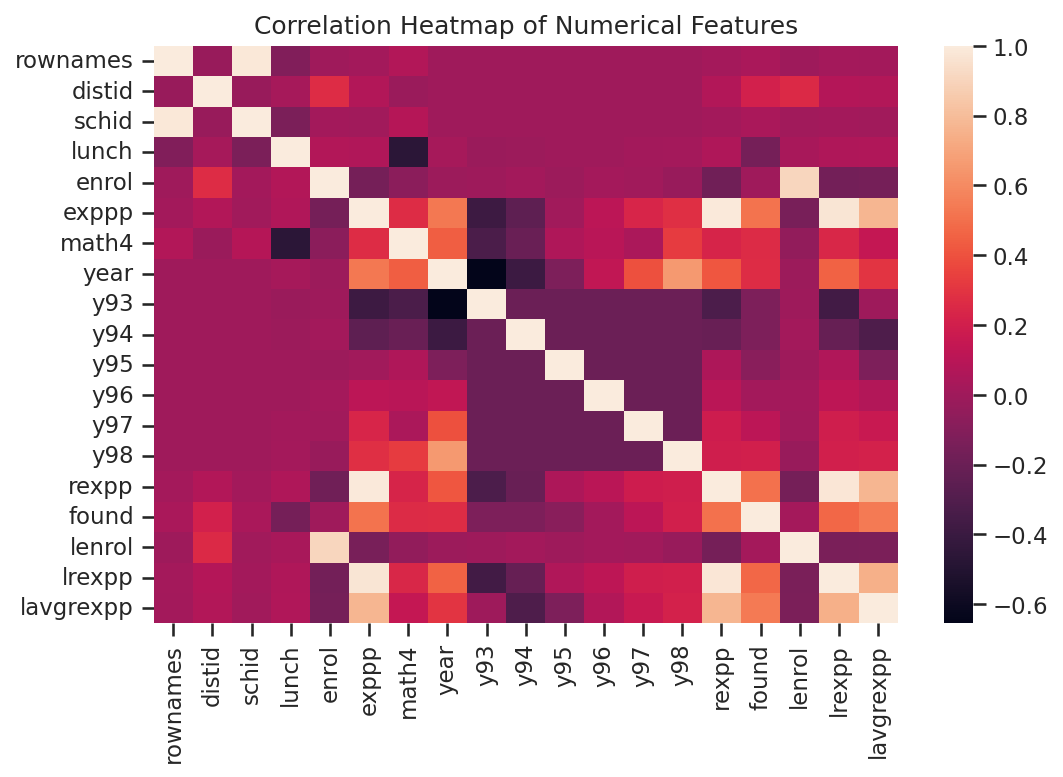

In [43]:
# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns)

# Adding a title
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

time series analysis but only year is given in my data so i will try to do maximum with it

In [44]:
# Import the necessary library
import pandas as pd

# Convert 'year' to datetime format (assuming 'year' is in the column 'year' of new_df)
new_df['year'] = pd.to_datetime(new_df['year'], format='%Y')

# Display the updated dataframe
print(new_df['year'].head())


0   1993-01-01
1   1994-01-01
2   1995-01-01
3   1996-01-01
4   1997-01-01
Name: year, dtype: datetime64[ns]


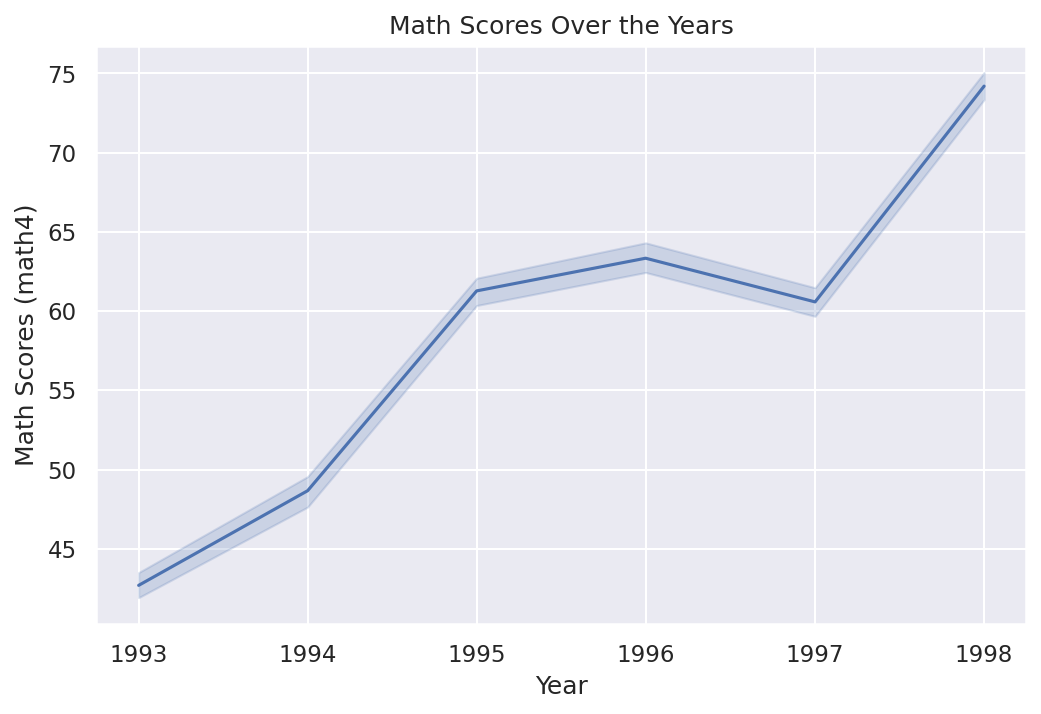

In [45]:
#After conversion I have identified the limitations of the data set as it doesnot give me any data regarding the month day time or the week
# Set plot runtime configuration
sns.set(rc={'figure.figsize':(11, 4)})  # Setting figure size
plt.rcParams['figure.figsize'] = (8, 5)  # Adjusting figure size
plt.rcParams['figure.dpi'] = 150  # Setting the figure resolution

# You can now plot with the updated configuration
# Example plot: Plotting year against 'math4' (as an example)
sns.lineplot(data=new_df, x='year', y='math4')

# Display the plot
plt.title("Math Scores Over the Years")
plt.xlabel("Year")
plt.ylabel("Math Scores (math4)")
plt.show()


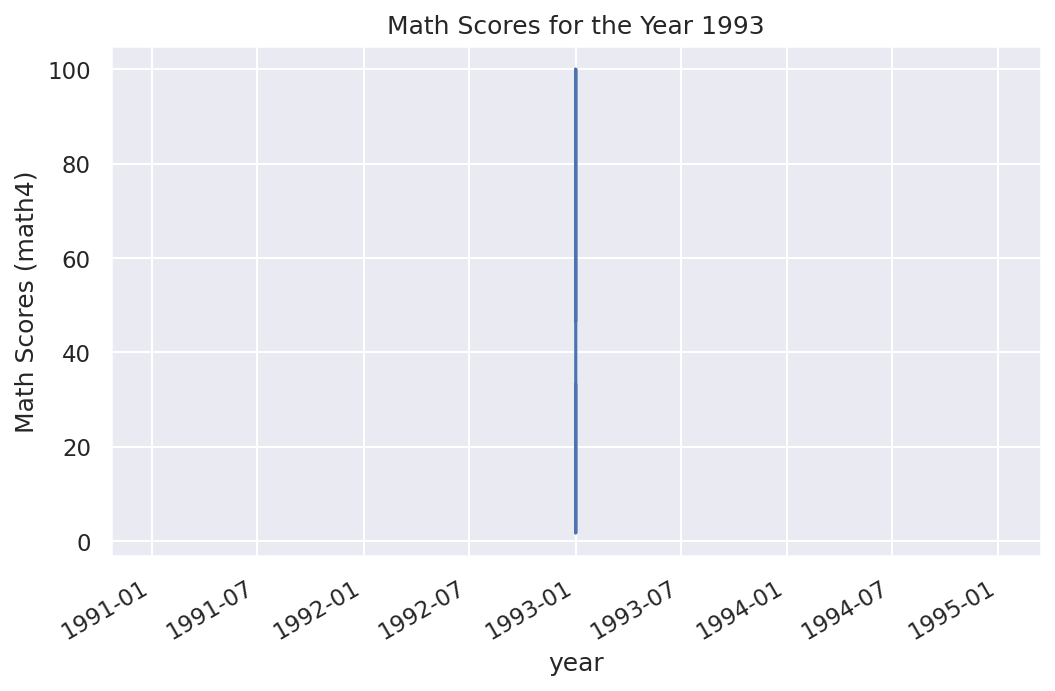

In [46]:
import matplotlib.pyplot as plt

# Filter the data for a specific year, e.g., 1993
df_year = new_df[new_df['year'].dt.year == 1993]

# Plotting a specific column (e.g., 'math4') for the year 1993
ax = df_year.set_index('year')['math4'].plot()

# Customize the plot
ax.set_ylabel('Math Scores (math4)')
ax.set_title('Math Scores for the Year 1993')
plt.show()


It shows a line like that because it is jan 1st for every value in the data set


there is no use doing time series analysis monthwise datewise weekwise as i have only data for the first of any year (limited by the data set)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/salemprakash/EDA/main/Data/school93_98.csv')

form here it is module-4

#Calculate summary statistics

In [8]:
# Calculate summary statistics
mean_val = df[num_col].mean()  # Compute the mean of the column
median_val = df[num_col].median()  # Compute the median
mode_val = df[num_col].mode().values[0]  # Compute the mode (first value if multiple modes exist)
skewness_val = df[num_col].skew()  # Compute skewness to understand data asymmetry
kurtosis_val = df[num_col].kurt()  # Compute kurtosis to understand tail heaviness

In [9]:
print("Summary Statistics:")
print(f"Mean: {mean_val:.2f}")
print(f"Median: {median_val:.2f}")
print(f"Mode: {mode_val:.2f}")
print(f"Skewness: {skewness_val:.2f}")
print(f"Kurtosis: {kurtosis_val:.2f}")

Summary Statistics:
Mean: 3778.58
Median: 3737.00
Mode: 4084.00
Skewness: 1.09
Kurtosis: 5.49


# Create a skewness plot

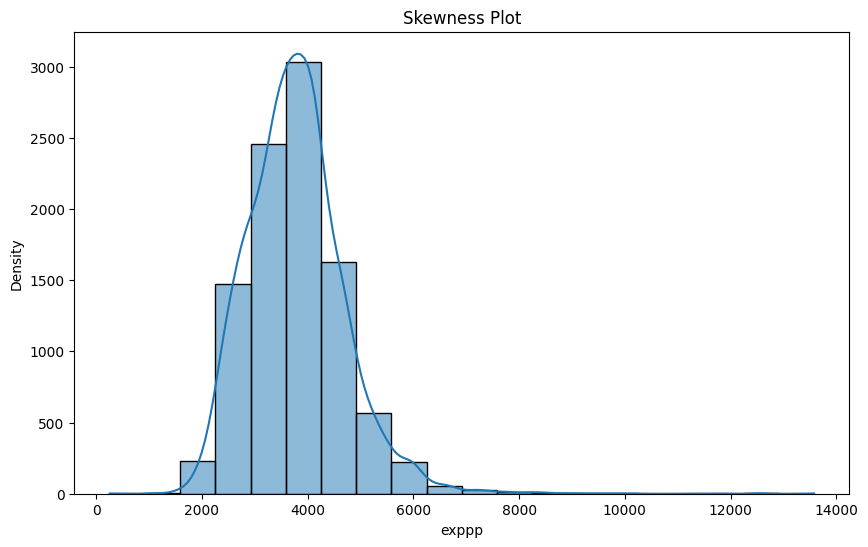

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df[num_col], bins=20, kde=True)
# Set plot title and labels
plt.title("Skewness Plot")  # Title of the plot
plt.xlabel(num_col)  # Label for the x-axis (numeric column name)
plt.ylabel("Density")  # Label for the y-axis

# Display the plot
plt.show()

 # Create a kurtosis plot

<ipython-input-7-2fba62558142>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[num_col], shade=True) #Removed the unecessary indentation


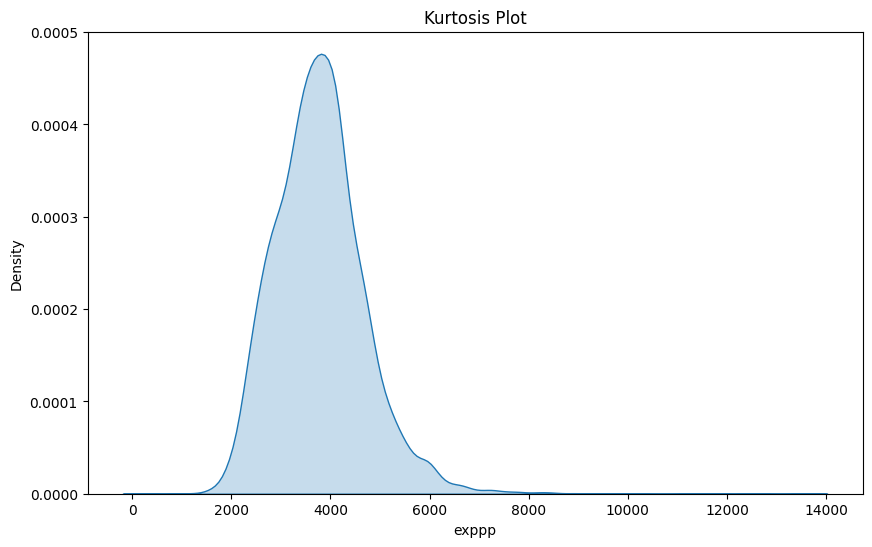

In [7]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[num_col], shade=True) #Removed the unecessary indentation
plt.title("Kurtosis Plot")
plt.xlabel(num_col)
plt.ylabel("Density")
plt.show()

# Create a histogram with frequency

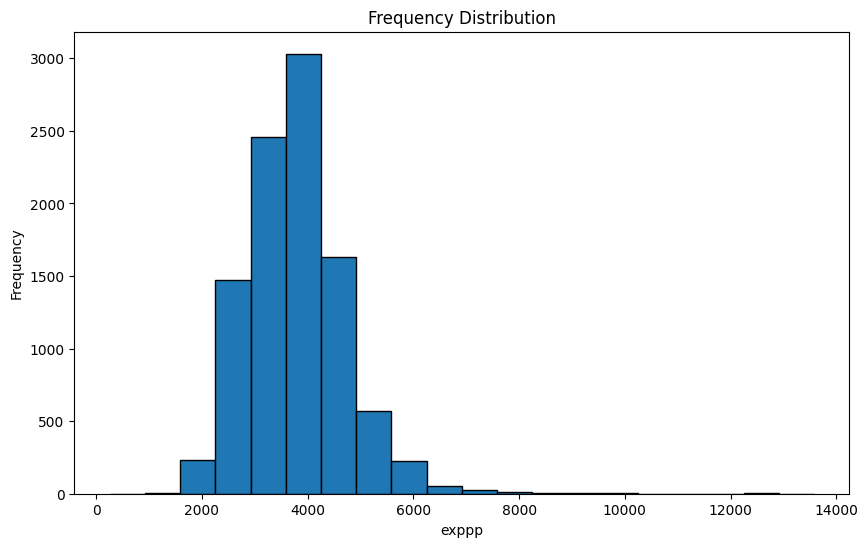

In [11]:
plt.figure(figsize=(10, 6))
df[num_col].plot.hist(bins=20, edgecolor="black")
plt.title("Frequency Distribution")
plt.xlabel(num_col)
plt.ylabel("Frequency")
plt.show()

# Create a box plot

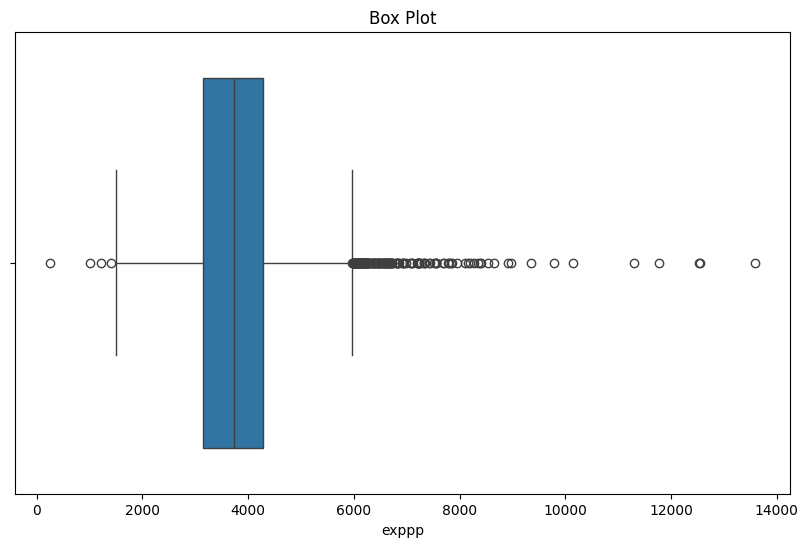

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[num_col])
plt.title("Box Plot")
plt.xlabel(num_col)
plt.show()

#Create a bar plot

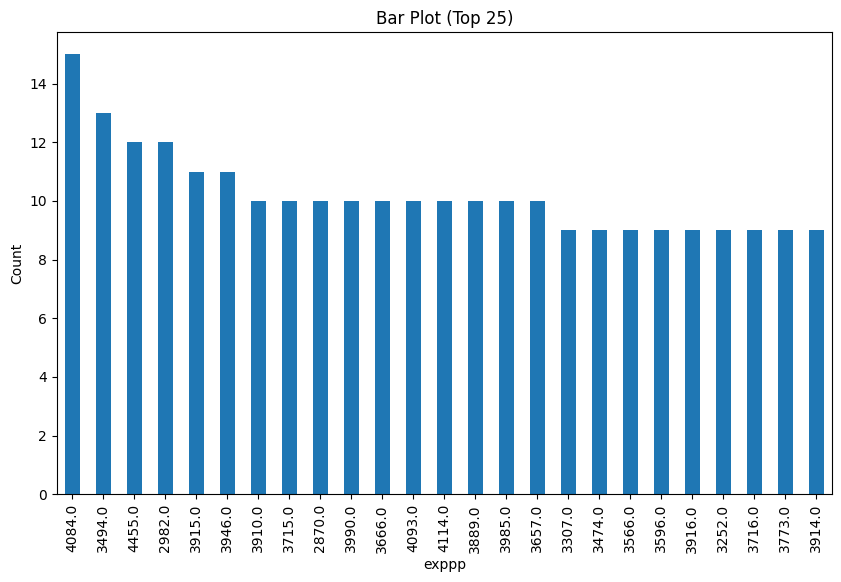

In [13]:
#If i do all in bar plot it dosnot have any meaning
plt.figure(figsize=(10, 6))
df[num_col].value_counts().nlargest(25).plot(kind="bar")
plt.title("Bar Plot (Top 25)")
plt.xlabel(num_col)
plt.ylabel("Count")
plt.show()

 # Create a cumulative frequency plot

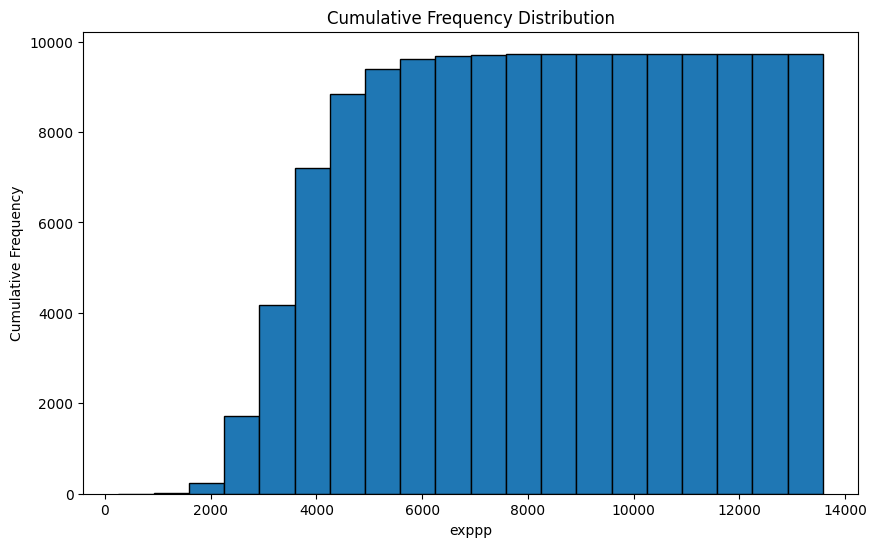

In [14]:
plt.figure(figsize=(10, 6))
df[num_col].plot(kind="hist", cumulative=True, bins=20, edgecolor="black")
plt.title("Cumulative Frequency Distribution")
plt.xlabel(num_col)
plt.ylabel("Cumulative Frequency")
plt.show()

#Triangular plot

/usr/local/lib/python3.11/dist-packages/ternary/plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)


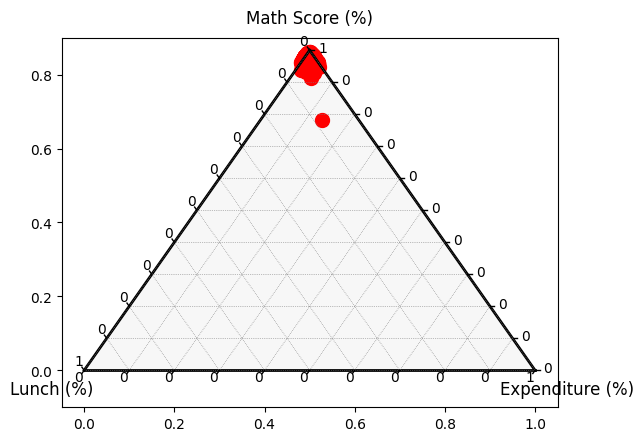

In [16]:
!pip install python-ternary
import ternary
import numpy as np # Importing numpy library and assigning it the alias 'np'

# Create a ternary plot using "lunch", "exppp", and "math4" columns
ternary_data = df[['lunch', 'exppp', 'math4']].dropna().to_numpy()
ternary_data = ternary_data / np.sum(ternary_data, axis=1, keepdims=True)  # Normalize the data

scale = 1  # Since data is already in proportion
figure, tax = ternary.figure(scale=scale)
tax.boundary(linewidth=2.0)  # Draw boundary
tax.gridlines(color="gray", multiple=0.1)  # Gridlines for readability

# Plot points
for row in ternary_data:
    tax.scatter([(row[0], row[1], row[2])], marker="o", color='red', s=100)

# Set Labels
tax.left_corner_label("Lunch (%)", fontsize=12)
tax.right_corner_label("Expenditure (%)", fontsize=12)
tax.top_corner_label("Math Score (%)", fontsize=12)

# Ticks and Styling
tax.ticks(axis='lbr', multiple=0.1, linewidth=1, fontsize=10)
tax.show()

# **Module-5**
#Import lib

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# Importing the dataset

In [50]:
school_data = pd.read_csv('https://raw.githubusercontent.com/salemprakash/EDA/main/Data/school93_98.csv')



#Using the elbow method to find the optimal number of clusters

<ipython-input-58-41c4c530a353>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X['lunch'] = X['lunch'].fillna(method='bfill')


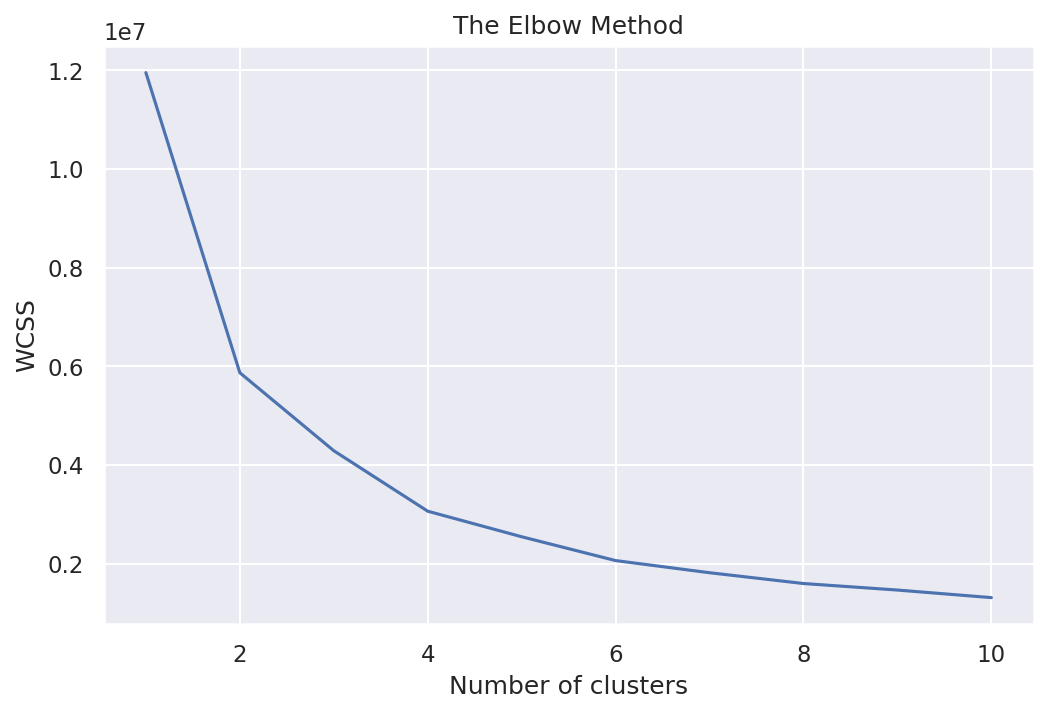

In [58]:
# Selecting features for clustering ('lunch' and 'math4')
X = school_data[['lunch', 'math4']].copy()

# Fill missing values in 'lunch' using backward fill
X['lunch'] = X['lunch'].fillna(method='bfill')

# Fill missing values in 'math4' using the median
X['math4'] = X['math4'].fillna(X['math4'].median())

# Remove rows with any remaining NaN values
X.dropna(inplace=True)

# Continue with the elbow method and KMeans clustering
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)  # Use the cleaned data X for clustering
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#Training the K-Means model on the dataset

In [59]:
# Applying K-Means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X) # Now X doesnot contain any NaN values so it wont give error

#Visualising the clusters

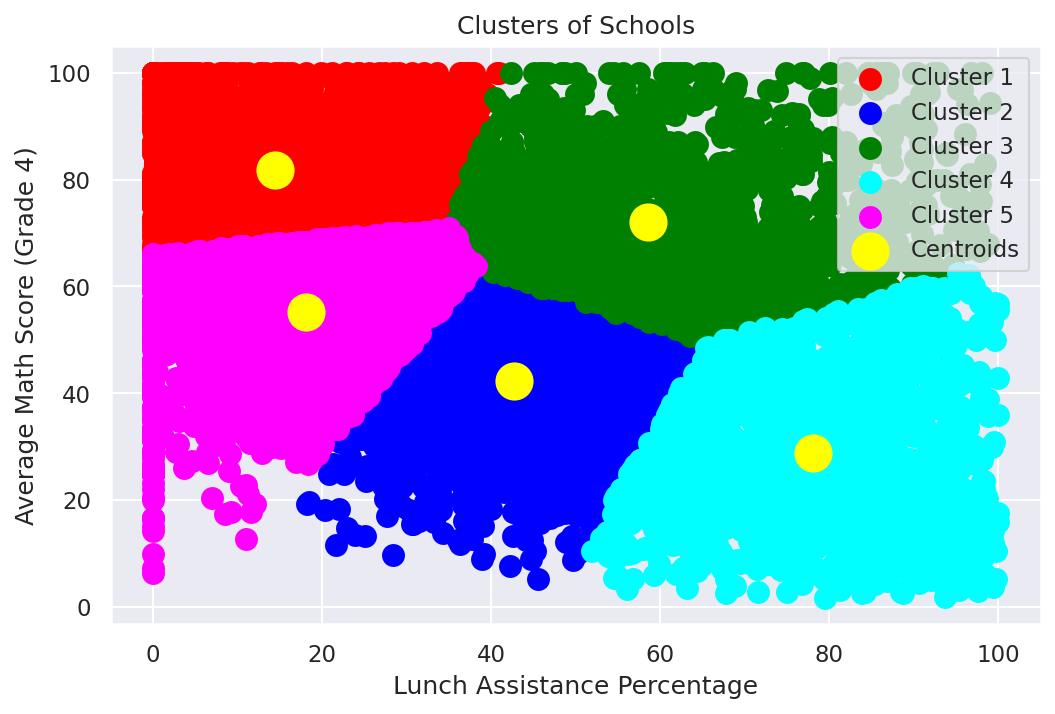

In [61]:
import matplotlib.pyplot as plt

# Accessing data using .iloc[] for integer-location based indexing
plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X.iloc[y_kmeans == 3, 0], X.iloc[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X.iloc[y_kmeans == 4, 0], X.iloc[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')

# Plotting centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

# Adjusted labels
plt.title('Clusters of Schools')
plt.xlabel('Lunch Assistance Percentage')
plt.ylabel('Average Math Score (Grade 4)')
plt.legend()
plt.show()

#Hierarchical Clustering

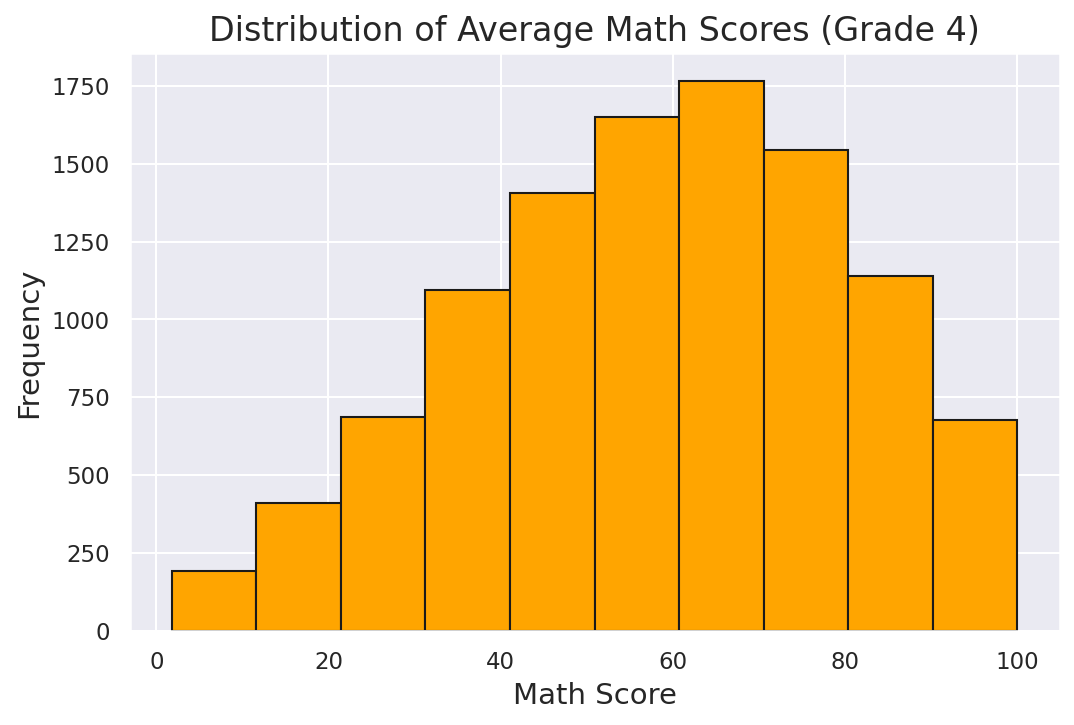

In [62]:
# Plotting the histogram for math scores
plt.figure(figsize=(8,5))
plt.title("Distribution of Average Math Scores (Grade 4)", fontsize=16)
plt.xlabel("Math Score", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True)
plt.hist(df['math4'], color='orange', edgecolor='k')
plt.show()

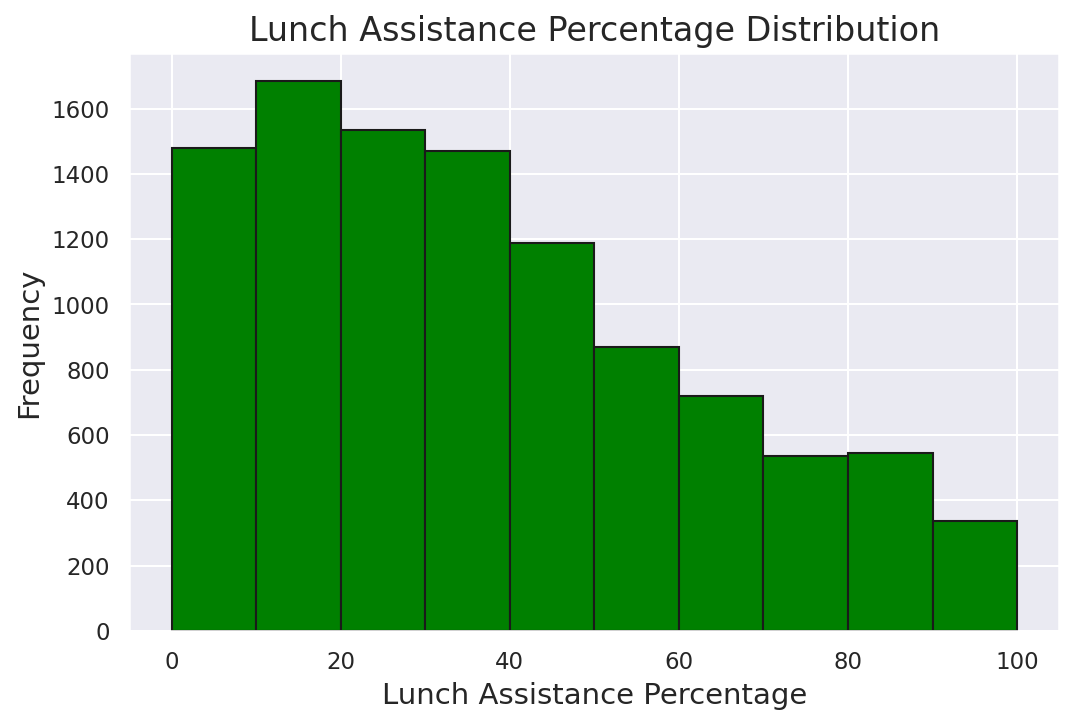

In [63]:
# Plotting the histogram for lunch assistance percentage
plt.figure(figsize=(8,5))
plt.title("Lunch Assistance Percentage Distribution", fontsize=16)
plt.xlabel("Lunch Assistance Percentage", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True)
plt.hist(df['lunch'], color='green', edgecolor='k')
plt.show()

#Dendogram


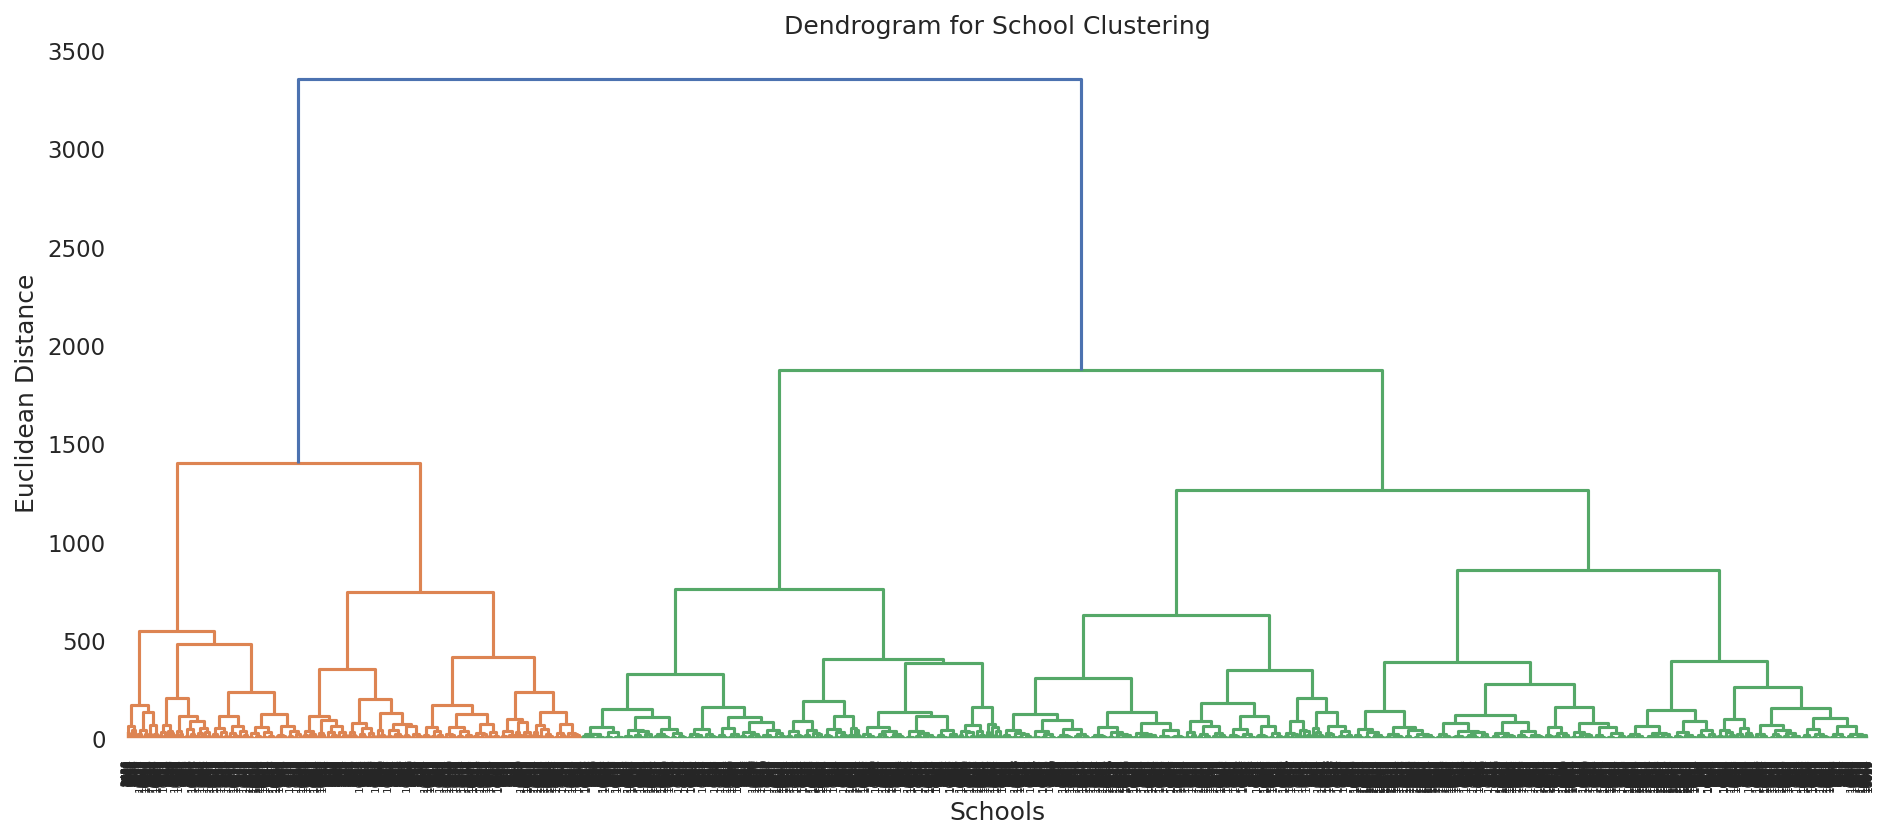

In [65]:
import scipy.cluster.hierarchy as sch # Import the necessary module and give it the alias 'sch'

plt.figure(figsize=(15,6))
plt.title('Dendrogram for School Clustering')
plt.xlabel('Schools')
plt.ylabel('Euclidean Distance')
dendrogram = sch.dendrogram(sch.linkage(X, method='ward')) # Now 'sch' is defined and can be used
plt.show()


#Optimal number of clusters

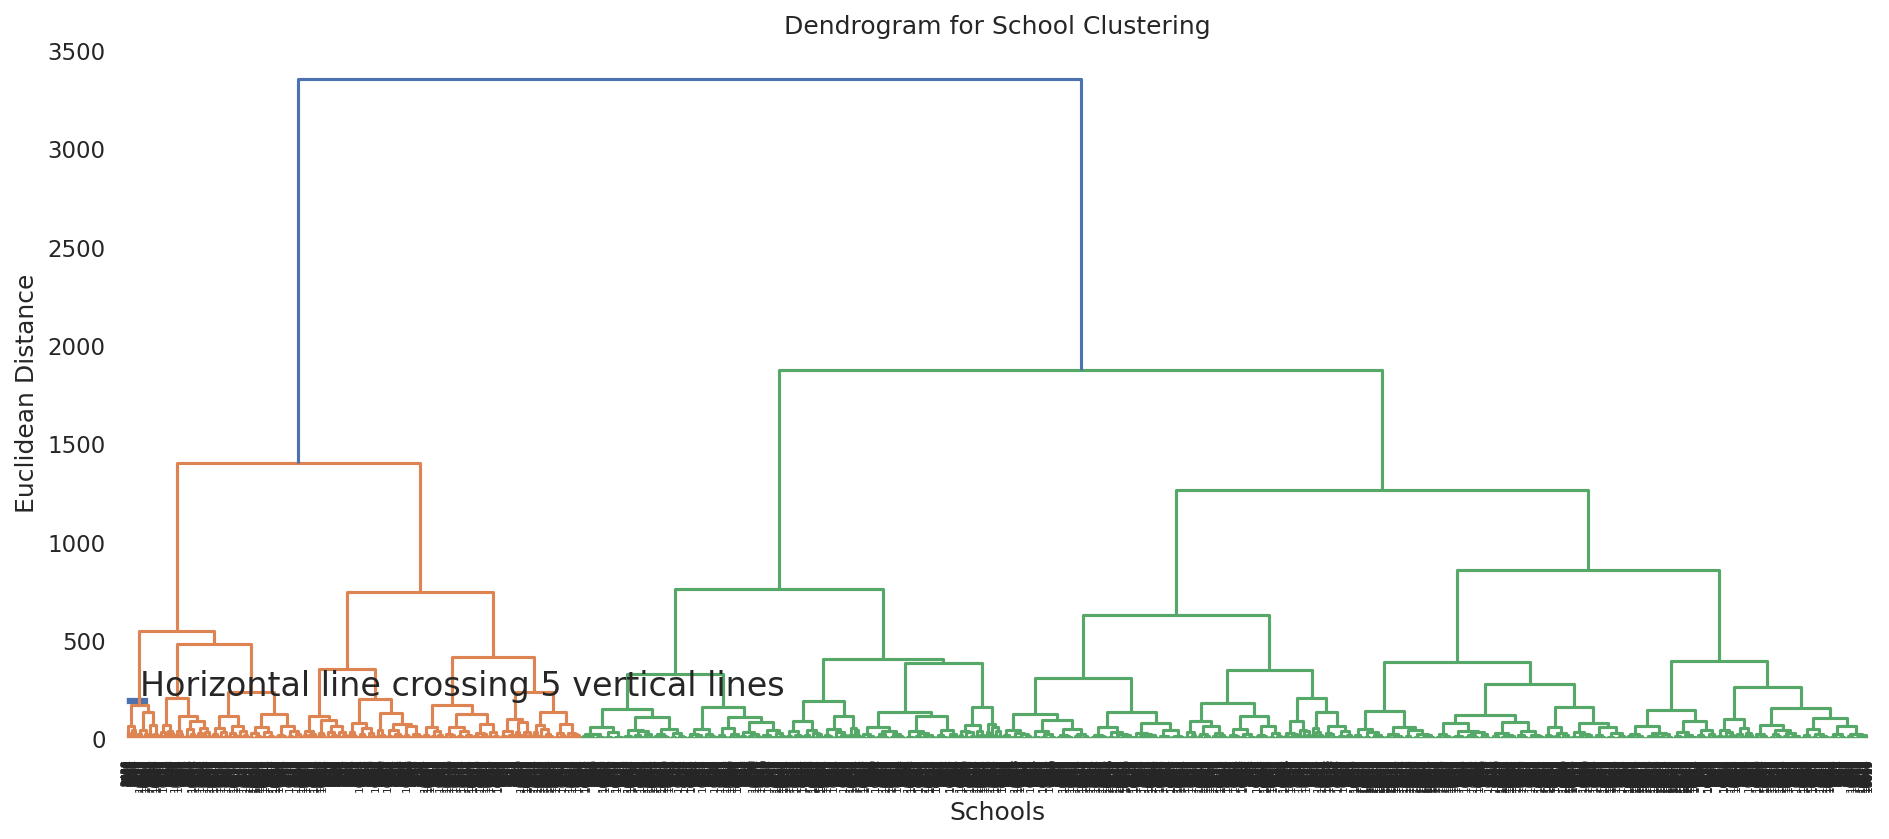

In [66]:
# Plotting the dendrogram
plt.figure(figsize=(15,6))
plt.title('Dendrogram for School Clustering')
plt.xlabel('Schools')
plt.ylabel('Euclidean Distance')

# Adding a horizontal line at y=190 to visualize clustering
plt.hlines(y=190, xmin=0, xmax=2000, lw=3, linestyles='--')
plt.text(x=900, y=220, s='Horizontal line crossing 5 vertical lines', fontsize=16)

# Generating the dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

plt.show()

#module-7


In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the school dataset
df = pd.read_csv('https://raw.githubusercontent.com/salemprakash/EDA/main/Data/school93_98.csv')

# Set Seaborn style
sns.set(style="ticks", color_codes=True)

# Adjust figure settings
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 150

# Display dataset information
print(df.keys())  # Display dataset keys
print(df.columns)  # Print column names
print(df.head())  # Show the first five rows
print(df.isna().sum())  # Check for missing values




Index(['rownames', 'distid', 'schid', 'lunch', 'enrol', 'exppp', 'math4',
       'year', 'y93', 'y94', 'y95', 'y96', 'y97', 'y98', 'rexpp', 'found',
       'lenrol', 'lrexpp', 'lavgrexpp'],
      dtype='object')
Index(['rownames', 'distid', 'schid', 'lunch', 'enrol', 'exppp', 'math4',
       'year', 'y93', 'y94', 'y95', 'y96', 'y97', 'y98', 'rexpp', 'found',
       'lenrol', 'lrexpp', 'lavgrexpp'],
      dtype='object')
   rownames  distid  schid      lunch  enrol   exppp      math4  year  y93  \
0         1   34010      1  39.799999  256.0  2506.0  46.599998  1993    1   
1         2   34010      1  35.000000  248.0  2870.0  44.700001  1994    0   
2         3   34010      1  36.590000  244.0  4176.0  86.500000  1995    0   
3         4   34010      1  40.549999  247.0  4333.0  84.300003  1996    0   
4         5   34010      1  49.490002  291.0  3666.0  83.800003  1997    0   

   y94  y95  y96  y97  y98        rexpp   found    lenrol    lrexpp  lavgrexpp  
0    0    0    0    0    0

#Heatmap

# Plot heatmap for correlation



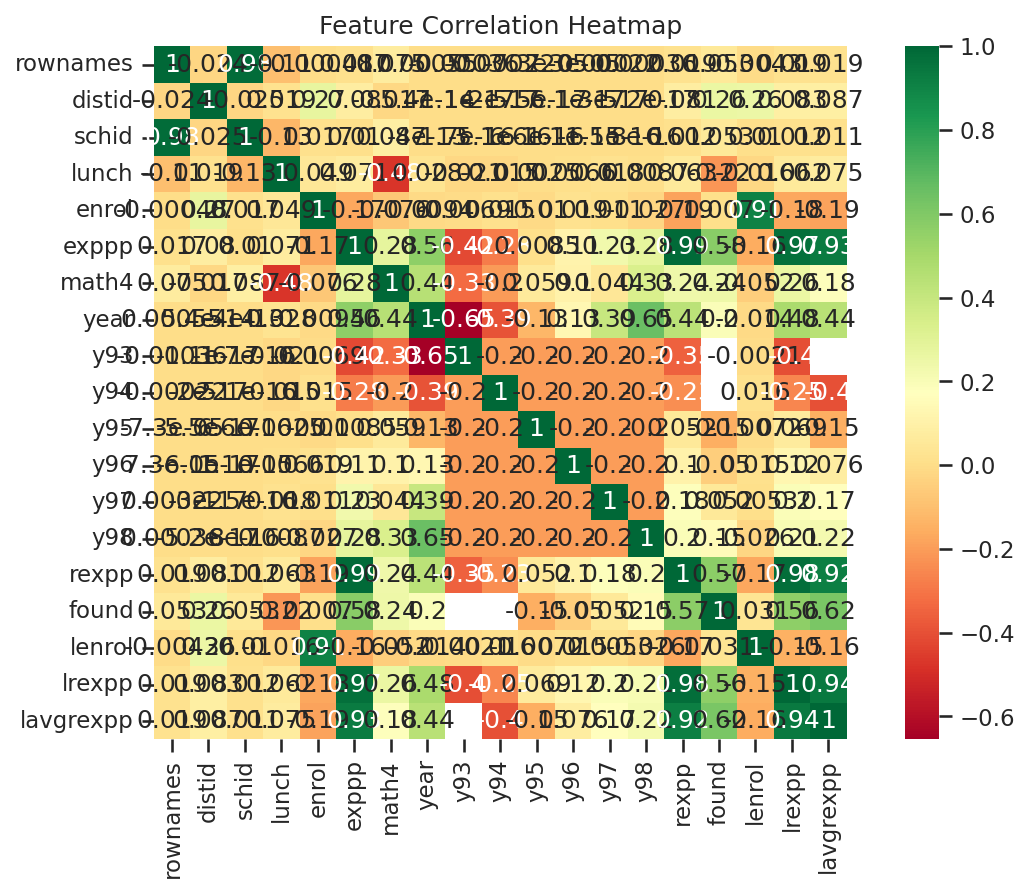

In [71]:
# Plot heatmap for correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, square=True, cmap='RdYlGn')
plt.title("Feature Correlation Heatmap")
plt.show()


# Linear regression plot for 'exppp' vs 'rexpp'

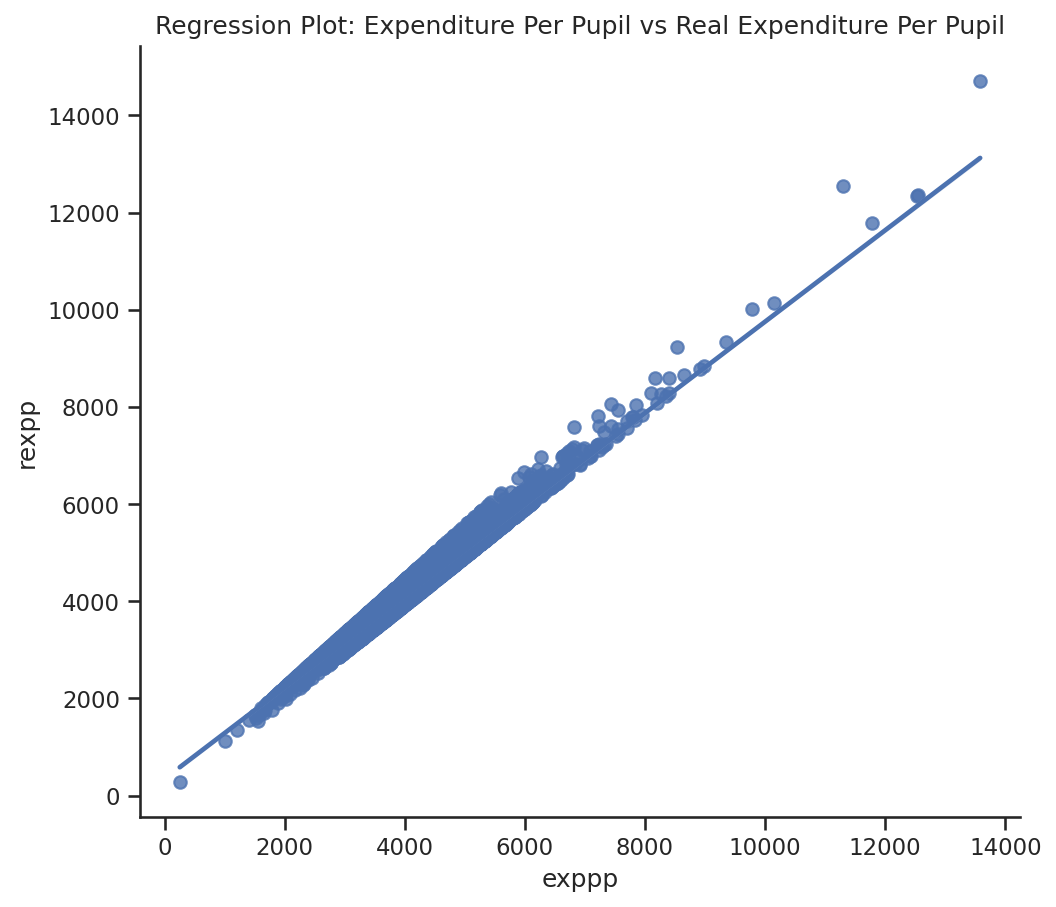

In [72]:
sns.lmplot(x='exppp', y='rexpp', data=df, height=6, aspect=1.2)
plt.title("Regression Plot: Expenditure Per Pupil vs Real Expenditure Per Pupil")
plt.show()
